In [11]:
# Import Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
# Import Dataset

df = pd.read_csv("C:\\Users\\adil_\\OneDrive\\Documents\\Dataset\\Tomato.csv")

In [23]:
df.sample(10)

,Date,Unit,Minimum,Maximum,Average,Market
456,2014-12-21,Kg,25,30,27.5,Tomato
1701,2018-06-17,Kg,30,35,32.5,Tomato
1535,2017-12-31,Kg,20,25,22.5,Tomato
2544,2020-10-26,Kg,90,100,95.0,Tomato
458,2014-12-23,Kg,40,45,42.5,Tomato
2280,2020-01-19,Kg,25,30,27.5,Tomato
1053,2016-08-24,Kg,45,50,47.5,Tomato
2143,2019-09-03,Kg,40,47,43.5,Tomato
1416,2017-08-26,Kg,50,55,52.5,Tomato
1385,2017-07-26,Kg,30,35,32.5,Tomato


In [39]:
df.drop(['Unit','Market'],inplace=True,axis = 1)

KeyError: "['Unit' 'Market'] not found in axis"

In [37]:
df.sample(2)

,Date,Minimum,Maximum,Average
1157,2016-12-06,25,35,30.0
282,2014-06-13,25,30,27.5


In [30]:
# Now I feel we should have a look over the date feature

df.Date.isnull().sum()

0

In [31]:
df.dtypes

Date        object
Minimum      int64
Maximum      int64
Average    float64
dtype: object

In [33]:
# For starters we'll have to typecast Date into datetime datatype from object

df['Date'] = pd.to_datetime(df['Date'])

In [40]:
#Now I feel our base for comparison should be month and year 
#so i'll be creating new columns consinsting of year and month 
#when the tomato prices where recorded.

#Creating column for year

df['year'] = df['Date'].dt.year


In [41]:
df.year.sample(5)

2445    2020
845     2016
334     2014
254     2014
849     2016
Name: year, dtype: int64

In [42]:
# Creating column for month

df['monthNo'] = df['Date'].dt.month


In [43]:
df.monthNo.sample(5)

2171    10
778     11
763     11
2703     4
333      8
Name: monthNo, dtype: int64

In [44]:
# Now we have 2 additional columns, Now I guess it will be safe
#to drop date feature

date = df.Date
df.drop(['Date'],axis=1)

,Minimum,Maximum,Average,year,monthNo
0,26,32,29.0,2013,6
1,20,25,22.5,2013,6
2,22,26,24.0,2013,6
3,24,28,26.0,2013,6
4,22,26,24.0,2013,6
...,...,...,...,...,...
2736,10,15,12.5,2021,5
2737,10,15,12.5,2021,5
2738,10,15,12.5,2021,5
2739,30,35,32.5,2021,5


In [45]:
date.head(2) # I've stored the actual feature 
#in new column in case it's required again.

0   2013-06-16
1   2013-06-17
Name: Date, dtype: datetime64[ns]

<AxesSubplot:xlabel='year', ylabel='Average'>

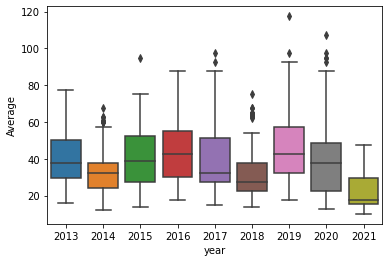

In [46]:
#EDA - Now we can start plotting and exploring data

sns.boxplot(x='year', y='Average', data=df)

In [ ]:
# The preceding plot shows that the average price range of the tomatos 
#was generally in the same alignment.


<AxesSubplot:xlabel='year', ylabel='Average'>

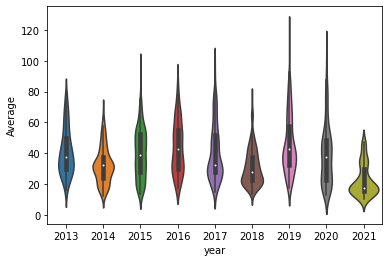

In [47]:
sns.violinplot(x='year', y='Average', data=df)

In [ ]:
# I suppose this plot supports the claim I made previously.
#One more interesting thing to note is the fall in prices in 
#2020 from 2019 and in 2021 from 2020. I came to the conclusion 
#that this happened due to restrictions; the complete cycle of transportation 
#was abruptly stopped, and henceforth tomatoes weren't sold or sold for 
#peanut prices, and even farmers weren't able to recover their investments.

<AxesSubplot:xlabel='monthNo', ylabel='year'>

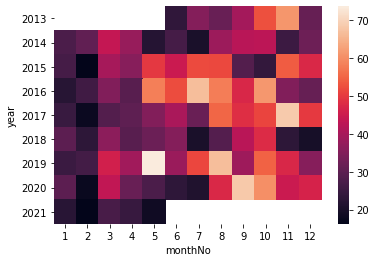

In [48]:
sns.heatmap (df.pivot_table(values='Average', index='year',columns='monthNo'))


In [ ]:
#From the above plot, we can see that prices are generally low in the period 
#of January through February. The reasons for it might be:

#Reduced demand: In winter, people may be less likely to consume fresh tomatoes as they are less commonly used in seasonal dishes. This reduction in demand can lead to lower prices as farmers try to sell off their inventory.
#Imports: Some countries may import tomatos from warmer regions during the winter months, which can increase the supply and lower prices.


<AxesSubplot:xlabel='monthNo', ylabel='Minimum'>

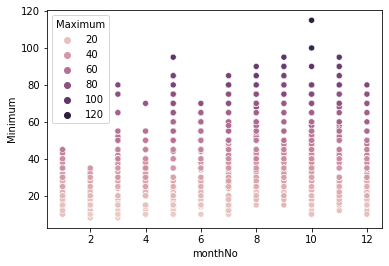

In [49]:
sns.scatterplot(x='monthNo', y='Minimum',hue='Maximum', data=df)

In [ ]:
# From the above graph, we can conclude that in October the prices kind of peak.
#Reason which I behind it is Transportation costs: In some cases, transportation costs may be higher in October due to increased demand for transportation services during the fall season. This can increase the cost of transporting tomatoes to market, which can lead to higher prices for consumers.

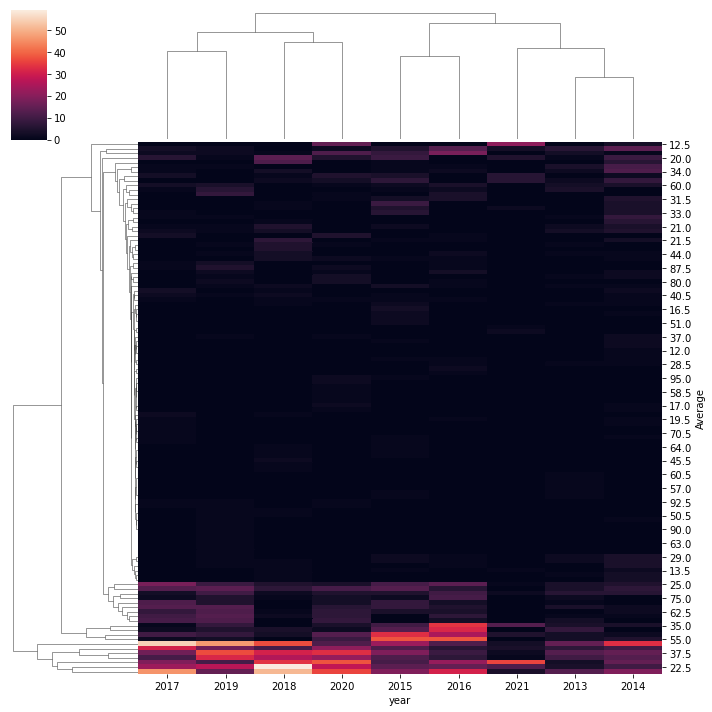

In [50]:
sns.clustermap(pd.crosstab(df['Average'],df['year']))

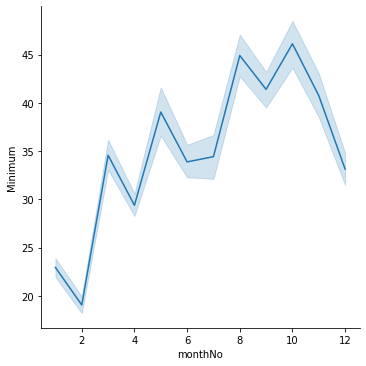

In [51]:
sns.relplot(
    data=df, kind="line",
    x="monthNo", y="Minimum",
    facet_kws=dict(sharex=False),
)

(array([1.42522512e-02, 2.22648805e-02, 3.00047394e-02, 1.31952661e-02,
        6.81925895e-03, 3.95517019e-03, 2.25035545e-03, 5.45540716e-04,
        1.36385179e-04, 3.40962948e-05]),
 array([  8. ,  18.7,  29.4,  40.1,  50.8,  61.5,  72.2,  82.9,  93.6,
        104.3, 115. ]),
 <BarContainer object of 10 artists>)

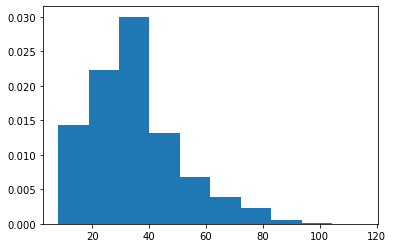

In [52]:
plt.hist(df['Minimum'],density=True,histtype='bar',)

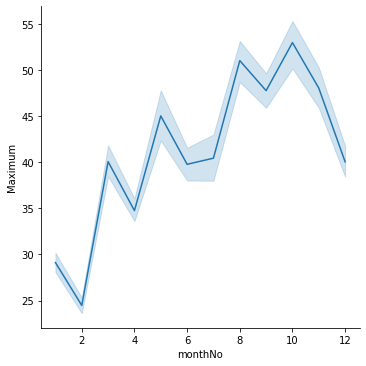

In [53]:
sns.relplot(
    data=df, kind="line",
    x="monthNo", y="Maximum",
    facet_kws=dict(sharex=False),
)

(array([1.22623536e-02, 2.22276271e-02, 2.15520153e-02, 1.94238383e-02,
        7.76953531e-03, 5.43867472e-03, 2.77000824e-03, 8.78295296e-04,
        2.02683530e-04, 6.75611766e-05]),
 array([ 12. ,  22.8,  33.6,  44.4,  55.2,  66. ,  76.8,  87.6,  98.4,
        109.2, 120. ]),
 <BarContainer object of 10 artists>)

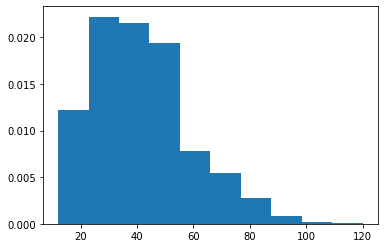

In [54]:
plt.hist(df['Maximum'],density=True,histtype='bar')

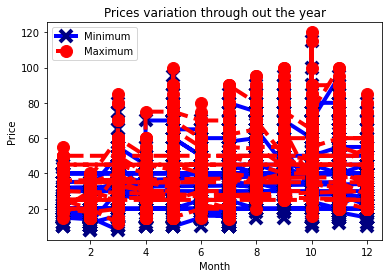

In [55]:
plt.plot(df.monthNo,df.Minimum,'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')

# Second line
plt.plot(df.monthNo,df.Maximum, 'r--o', linewidth=4, markersize=12,);

# Title
plt.title('Prices variation through out the year')

# Line labels
plt.legend(['Minimum', 'Maximum'])

# Axis labels
plt.xlabel('Month'); plt.ylabel('Price');


C:\Users\adil_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


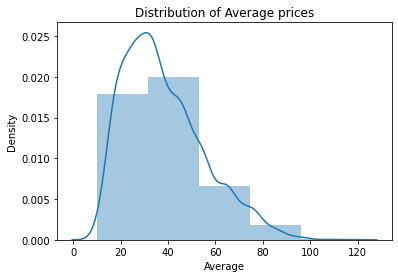

In [58]:
plt.title("Distribution of Average prices")

sns.distplot(df.Average,bins=5);

In [59]:
print(df.Average.skew())
df.Average.describe()

0.8227165567186671


count    2741.000000
mean       38.185516
std        16.970949
min        10.000000
25%        25.000000
50%        35.000000
75%        47.500000
max       117.500000
Name: Average, dtype: float64

In [ ]:
# Mean of Average prices is 38.185516

#The following are the conclusions I was able to map:
#1. Tomato prices are normally low at the start of the year.

#2. Prices peak around the middle of October.

#3. Prices plummeted drastically during and after COVID.